# Approximation and round-off error

## Motivation
Remember the falling parachutist: we had an exact, analytical solution and an approximate one. Usually we will only have the approximation, so we need a way to estimate how far off from the exact solution we are.

There will be almost always an error, and we will need to decide how much of it is acceptable and how to minimize it.

## Round-off error

In [1]:
0.1 + 0.2 

0.30000000000000004

## Truncation

## Significant figures

$0.00001845 = 0.1845 × 10^{-4}$

$0.0001845 = 0.1845 × 10^{−3}$

$0.001845 = 0.1845 × 10^{−2}$

## Accuracy and precision

![Bias and variance](https://cdn-images-1.medium.com/max/1600/1*wTbewHG05BXOIwFjtilU8A.png)

Inaccuracy or Bias

Imprecision, Uncertainty or Variance.

# Error definitions

$$True\ value = Approximation + Error$$

## True error

$$E_t = True\ value - Approximation$$


## Relative error

It's not the same being off by 1cm when measuring height of a person or Earth-Moon distance.

$$\varepsilon_t = \frac{true\ error}{true\ value}$$

## Approximate relative error

Most times we will be using an approximation precisely because we don't know the true value.

$$\varepsilon_a = \frac{current\ approx - previous\ approx}{current\ approx}$$ 

Generally we will define a tolerance threshold:

$$\left|\varepsilon_a\right| < \varepsilon_s$$

# Iterative methods

#### Example

We could try to approximate $e^x$ using a polynomial from the Maclaurin expansion:

$$e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \ldots + \frac{x^n}{n}$$

Let us approximate $e^{x_0}$; $x_0=0.5$, with a tolerance $\varepsilon_s = 0.0005$, iteratively.

In [7]:
import math

x_0 = 0.5
e_s = 5e-4
e_a = 1
estimate = 0
n = 0

while abs(e_a) > e_s:
    print('working')
    previous_estimate = estimate
    estimate = estimate + (x_0 ** (n)) / math.factorial(n)
    e_a = (estimate - previous_estimate) / estimate
    n = n + 1
    
estimate, math.exp(0.5)

working
working
working
working
working
working


(1.6486979166666667, 1.6487212707001282)

# Floating point representation

$$ m \cdot b^e$$

* $m$: mantissa
* $b$: base
* $e$: exponent

![Floating point example](http://www.dspguide.com/graphics/F_4_2.gif)

## Precision

Single and double precision: Only about 7 decimal digits are representable in single-precision IEEE format, and about 16 in double-precision IEEE format[[1]]. 

[Python precision] depends on the underlying system but generally it uses 64 bit floating point numbers.

When we need more, we can use a package specifically designed for numerical computation like [numpy].



[1]: http://www.lahey.com/float.htm
[Python precision]: https://docs.python.org/3/tutorial/floatingpoint.html
[numpy]: https://docs.scipy.org/doc/numpy/user/basics.html

## Conflictive operations

* Common arithmetic operations
* Large computations
* Adding a large and a small number
* Subtractive cancellation
* Smearing: Smearing occurs whenever the individual terms in a summation are larger than the summation itself. One case where this occurs is in series of mixed signs.
    * Inner Products

#### Example

Suppose we have a (decimal) computer with a 4 digit mantissa and a 1 digit exponent.
Also, chopping is used. How would we
compute $0.1557 × 10^1 + 0.4381 × 10^{−1}$?

#### Example

Large Numbers of Interdependent Computations

In [4]:
import numpy as np

times = 10000000

ones = np.array([1.0]  * times)
fractions = np.array([1 / times] * times )

ones.sum() - times

0.0

In [10]:
fractions.sum() - 1.0

1.7319479184152442e-14

#### Example

Adding a large and a small number, subtractive cancellation.

In [25]:
(4e23 + 1e-1)

4e+23

In [26]:
(4e23 + 2e10) - 4e23

19998441472.0

# Problems

#### Exercise

The “divide and average” method, an old-time method for approximating the square root of any positive number a, can be formulated as:

$$x_{i+1} = \frac{ x_i + a/x_i}{2}$$

Implement it in a Python function with a default relative error threshold of 0.0005. Use 1 as an initial estimate. Test the function by finding the square root of 5.

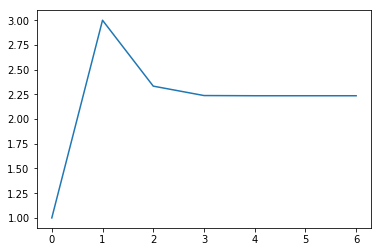

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

def sqrt(a):
    e_s = 5e-10
    x_i = 1
    e_a = 1
    history = [x_i]

    # Check error
    while abs(e_a) > e_s:
        
        # Improve estimate
        x_i1 = (x_i + a / x_i) / 2
        
        # Calculate approximate error
        e_a = (x_i1 - x_i) / x_i1
        
        # Keep for plotting
        history.append(x_i1)
        
        # Save current estimate to compare in next iteration
        x_i = x_i1

    
    return x_i, history

estimate, history = sqrt(5)
plt.plot(history);

# Further reading

[The bias-variance tradeoff]

[Floating Point Arithmetic in Python: Issues and Limitations]

[The Perils of Floating Point]

[An example of interpreting a float]


[An example of interpreting a float]: https://math.stackexchange.com/questions/1484561/finding-the-mantissa-from-binary-with-floating-point-numbers
[The Perils of Floating Point]: http://www.lahey.com/float.htm
[The bias-variance tradeoff]: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff
[Floating Point Arithmetic in Python: Issues and Limitations]: https://docs.python.org/3/tutorial/floatingpoint.html